<a href="https://colab.research.google.com/github/AnnaBo1/Yulu-Bike-Rental-Demand-Analysis/blob/main/Bike_Rental_Analysis_Project%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*  **Import Libraries, Loading and Previewing Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('yulu_rental.csv')

In [2]:
display(df.head(3))
display(df.dtypes)
display(df.shape)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


(10886, 12)

In [3]:
df['datetime'] = pd.to_datetime(df.datetime)

In [4]:
#Check for missing values
missing_data = df.isnull().sum()
missing_data

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


# How has the number of registered users changed over time?

In [5]:
# Aggregate the data by day
df['date'] = df.datetime.dt.date

In [6]:
df_registered_by_date = df.groupby('date')['registered'].sum()
df_registered_by_date

,registered
date,
2011-01-01,654
2011-01-02,670
2011-01-03,1229
2011-01-04,1454
2011-01-05,1518
...,...
2012-12-15,4280
2012-12-16,3248
2012-12-17,4373


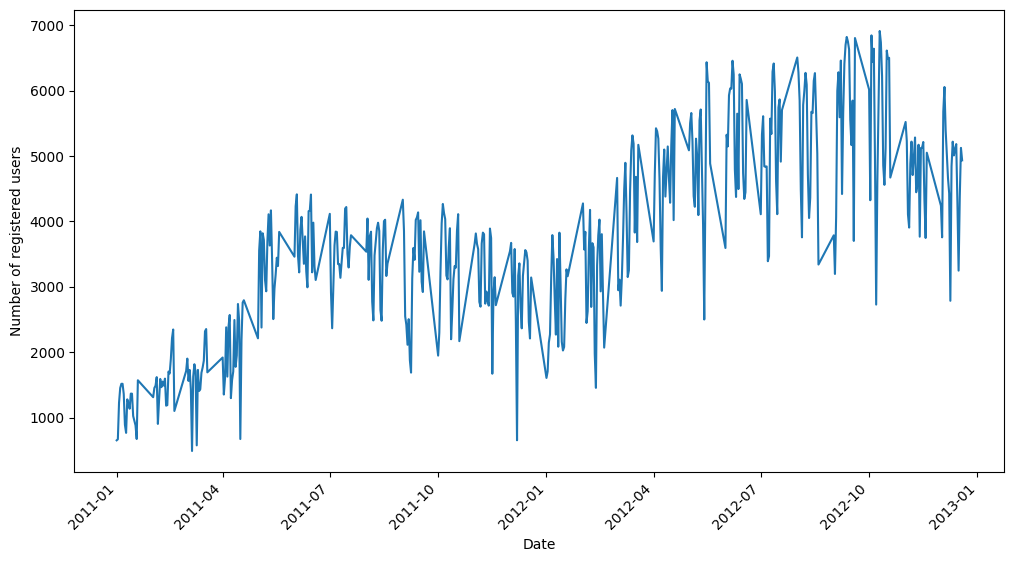

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_registered_by_date)
plt.xlabel('Date')
plt.ylabel('Number of registered users')
plt.xticks(rotation=45, ha='right')
plt.show()

# Which days of the week show the highest number of zero rentals (no activity from registered users)?

New Column Creation (dayofweek): the day of the week (0 for Monday, 6 for Sunday).

In [8]:
df['dayofweek'] = df.datetime.dt.day_of_week

In [9]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


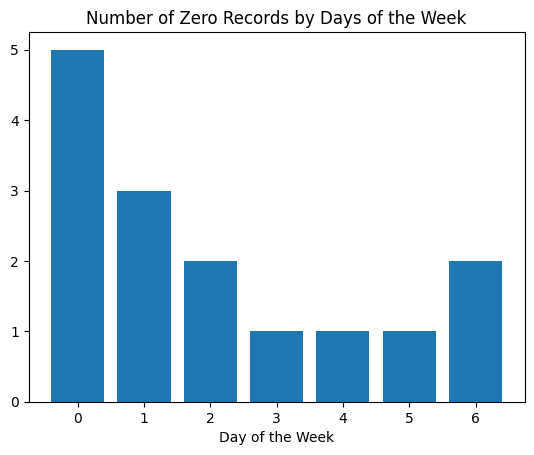

In [10]:
filtered = df[df['registered'] == 0]
grouped = filtered.groupby('dayofweek').size()
plt.bar(grouped.index, grouped.values)
plt.xlabel('Day of the Week')
plt.title('Number of Zero Records by Days of the Week')
plt.show()

# How do weather conditions affect the number of registered users?

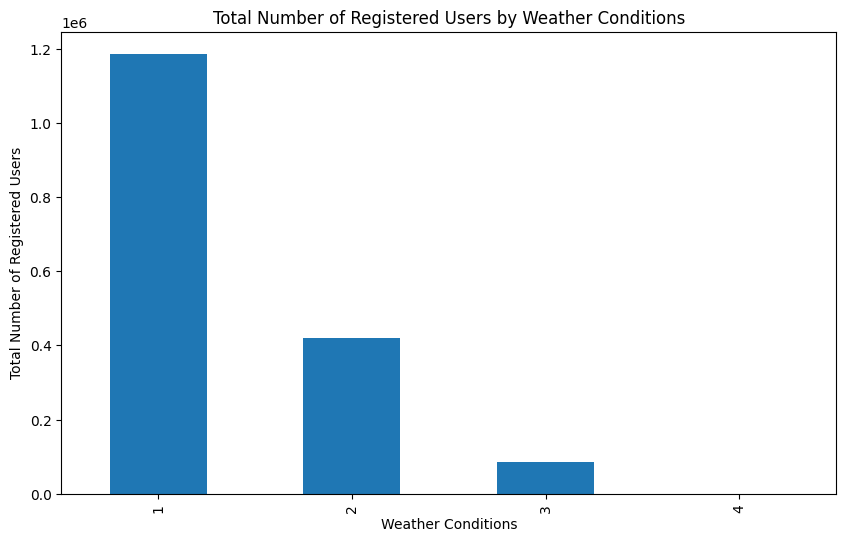

In [11]:
grouped = df.groupby('weather')['registered'].sum()
plt.figure(figsize=(10, 6))
ax = grouped.plot(kind='bar')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Number of Registered Users')
plt.title('Total Number of Registered Users by Weather Conditions')
plt.show()

# How does humidity affect the number of registered users?

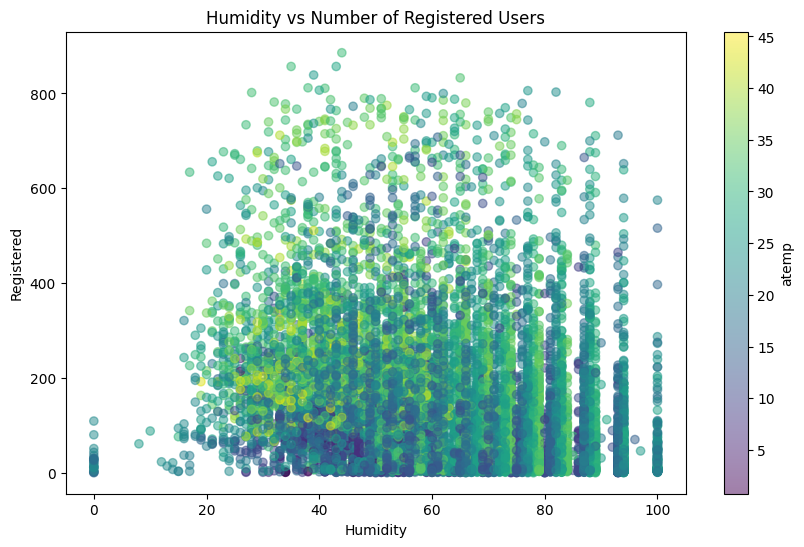

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['humidity'],
    df['registered'],
    c=df['atemp'],
    alpha=0.5,
)
plt.xlabel('Humidity')
plt.ylabel('Registered')
plt.title('Humidity vs Number of Registered Users')
plt.colorbar(label='atemp')
plt.show()

# What effect do the holidays have on the number of rental bikes?

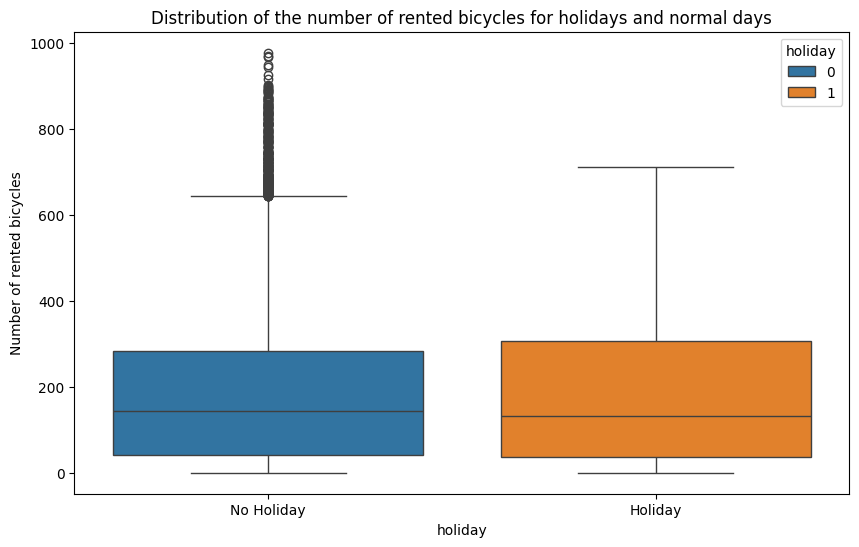

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='holiday', y='count', hue='holiday')
plt.title('Distribution of the number of rented bicycles for holidays and normal days')
plt.ylabel('Number of rented bicycles')
plt.xticks(ticks=[0, 1], labels=['No Holiday', 'Holiday'])
plt.show()

# What is the dependence of the number of rented bicycles on the perceived temperature (atemp) under different weather conditions (weather)?

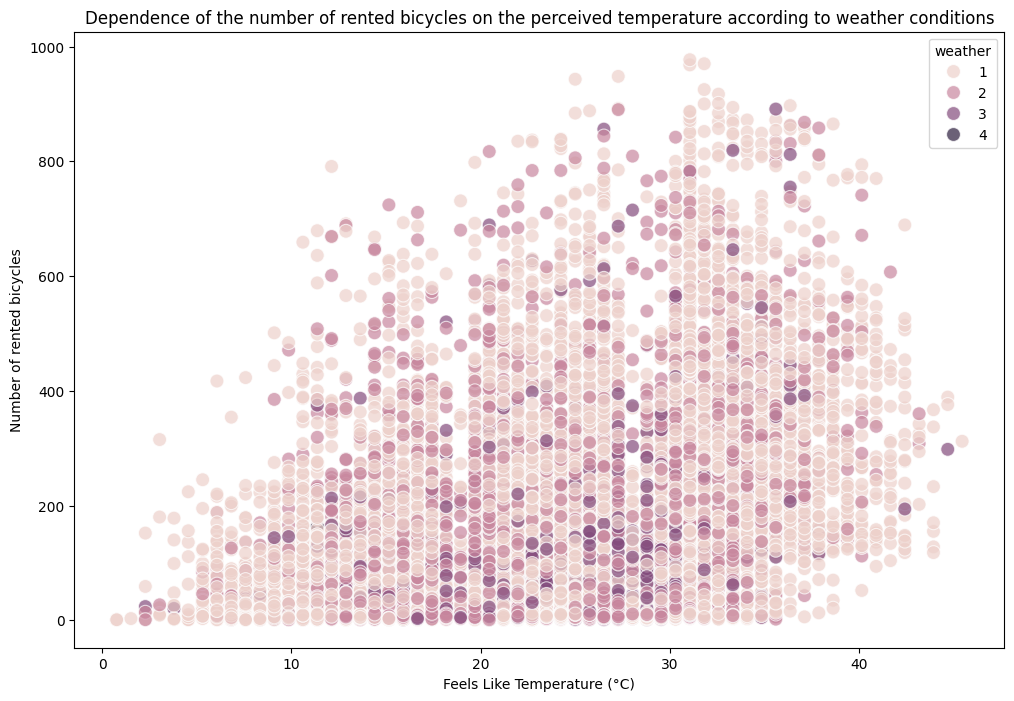

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='atemp', y='count', hue='weather', alpha=0.7, s=100)
plt.title('Dependence of the number of rented bicycles on the perceived temperature according to weather conditions')
plt.xlabel('Feels Like Temperature (°C)')
plt.ylabel('Number of rented bicycles')
plt.show()

# How does the season affect the number of bicycle rentals (count) depending on the temperature (temp) and humidity (humidity)?

In [15]:
filtered_df = df[['season', 'temp', 'humidity', 'count']]
filtered_df

,season,temp,humidity,count
0,1,9.84,81,16
1,1,9.02,80,40
2,1,9.02,80,32
3,1,9.84,75,13
4,1,9.84,75,1
...,...,...,...,...
10881,4,15.58,50,336
10882,4,14.76,57,241
10883,4,13.94,61,168
10884,4,13.94,61,129


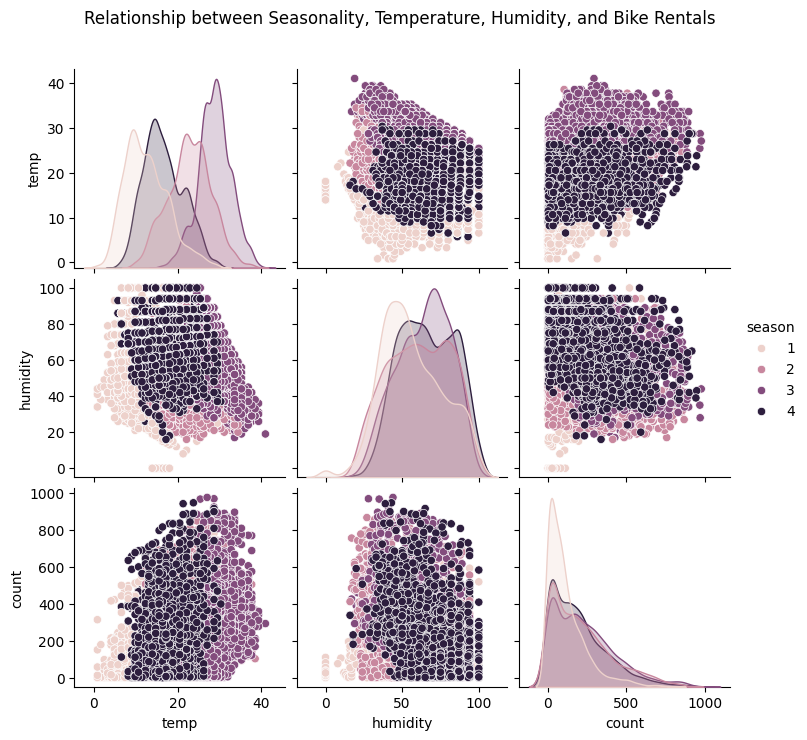

In [16]:
sns.pairplot(filtered_df, hue='season')
plt.suptitle('Relationship between Seasonality, Temperature, Humidity, and Bike Rentals')
plt.subplots_adjust(top=0.9)
plt.show()

### **Conclusions and Recommendations**


#### **Conclusions:**

1. **Trends in Registered Users Over Time**:
   - The number of registered users fluctuates over time, and clear seasonal patterns emerge. These trends indicate the impact of external factors such as weather, holidays, and seasons on user behavior.

2. **Zero Activity by Days of the Week**:
   - The analysis revealed that certain days, especially Mondays, have the highest number of zero activity records, indicating that registered users are less likely to rent bikes at the beginning of the workweek. This suggests the need for promotional strategies or incentives on these days.

3. **Impact of Weather on Registered Users**:
   - Weather significantly affects the number of registered users. Clear or partly cloudy days tend to see higher activity, while harsh weather conditions like heavy rain or snow lead to fewer rentals. Understanding these patterns can help optimize bike availability and plan for weather-related disruptions.

4. **Humidity's Effect on Registered Users**:
   - A moderate correlation between humidity levels and registered users was observed. Extremely high or low humidity levels seem to discourage bike rentals, especially in very hot or very humid conditions. The "feels like" temperature (atemp) also plays a crucial role in influencing user experience.

5. **Effect of Holidays on Rentals**:
   - The analysis showed that holidays tend to increase the number of rentals, with users showing a preference for renting bikes during their free time. This suggests that promoting bike rentals during public holidays could lead to higher demand.

6. **Temperature and Bike Rentals Under Different Weather Conditions**:
   - The relationship between perceived temperature and bike rentals varies depending on the weather. Users are more likely to rent bikes when the temperature feels comfortable in milder weather conditions, highlighting the importance of temperature in influencing bike rental activity.

7. **Seasonal Trends and Bike Rentals**:
   - The analysis confirmed that seasons play a critical role in bike rental numbers. Warmer months (spring and summer) generally saw more rentals, while colder months (fall and winter) exhibited lower bike usage. A combination of temperature and humidity also influences these seasonal changes.

#### **Recommendations:**

1. **Promotions on Low-Activity Days**:
   - Implement promotional campaigns (e.g., discounts or incentives) on days with low activity, particularly Mondays, to boost bike rentals during these times.

2. **Weather-Based Operations Strategy**:
   - During harsh weather conditions (e.g., heavy rain, snow), consider adjusting bike availability or offering indoor alternatives to encourage continued use. Conversely, ensuring higher bike availability on clear or mild days could further enhance user satisfaction.

3. **Optimize Seasonal Strategies**:
   - Increase marketing efforts in the warmer seasons (spring and summer), as these periods show a higher demand for bike rentals. Conversely, consider offering indoor rental options, or gear such as raincoats, during colder or rainy months.

4. **Leverage Holidays for Increased Rentals**:
   - Target marketing efforts around public holidays, as these times tend to have higher rental activity. Offering special promotions during this period can increase customer engagement and overall revenue.

5. **Consider Environmental Factors**:
   - Focus on monitoring and optimizing rental services based on weather, humidity, and temperature. Understanding how these variables affect user behavior will allow for better planning and resource allocation, especially in extreme weather conditions.

